<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/luisa_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# import pickle
# import seaborn as sns

# import matplotlib.pyplot as plt

# from nltk.stem import SnowballStemmer
# from wordcloud import WordCloud 

# import re

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
#import sqlalchemy as sql
import datetime

from PIL import Image 

import pickle

In [ ]:
# name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t')[['nconst','primaryName','primaryProfession']]


In [ ]:

# df = pd.read_csv('myfile.csv',skiprows=lambda x: x not in rownumberList)

# title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t')[['tconst','nconst']]

In [2]:
col_list = ['nconst','primaryName','primaryProfession']


name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list)


In [3]:
col_list2 = ['tconst','nconst']
# rownumberList = [1,2,3]
title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)
# df = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz',skiprows=lambda x: x not in rownumberList)
# # , skiprows=lambda x: x not in rownumberList)



In [ ]:
# # options = ['tt0111161', 'tt0468569','tt1375666','tt0137523','tt0109830','tt0110912','tt0068646','tt0133093','tt0167260','tt0120737'] 
    
# # selecting rows based on condition 
# rslt_df = title_p[title_p['tconst'].isin(options)] 
    
# print('\nResult title_p :\n',
#       rslt_df)


Result title_p :
              tconst     nconst
578329    tt0068646  nm0722000
578330    tt0068646  nm0000008
578331    tt0068646  nm0000199
578332    tt0068646  nm0001001
578333    tt0068646  nm0000473
...             ...        ...
18854560  tt1375666  nm0634240
18854566  tt1375666  nm0858799
18854567  tt1375666  nm0001877
18854573  tt1375666  nm0002892
18854574  tt1375666  nm0809059

[100 rows x 2 columns]


In [4]:
# other = pd.DataFrame({'title_p': ['tconst', 'nconst'],
#                       'name_b': ['nconst', 'primaryName', 'primaryProfession']})

# result = pd.concat([rslt_df, name_b], axis=1, join="outer")

top_movies= pd.merge(title_p, name_b, how='inner', on=['nconst', 'nconst'])



In [7]:
top_movies.to_pickle('/content/topm12.pickle')



In [2]:
top_movies5 = pd.read_pickle("/content/topm12.pickle")

In [3]:
col_list3 = ['tconst','averageRating','numVotes']
title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list3)

In [5]:
top_movies2= pd.merge(top_movies5, title_ratings, how='inner', on=['tconst', 'tconst'])

In [6]:
top_movies2.to_pickle('/content/topm13.pickle')

In [7]:
top_movies = pd.read_pickle("/content/topm13.pickle")

In [ ]:
top_movies.head()

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921
1,tt0000001,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.7,1921
2,tt0000001,nm0374658,William Heise,"cinematographer,director,producer",5.7,1921
3,tt0000005,nm0005690,William K.L. Dickson,"cinematographer,director,producer",6.2,2543
4,tt0000005,nm0443482,Charles Kayser,actor,6.2,2543


In [8]:
top_movies['wheighted'] = (top_movies['averageRating']*top_movies['numVotes'])/top_movies['numVotes'].sum()
top_movies.sort_values(by=('wheighted'), ascending=False).head(10)

# top_movies.sort_values(by=(['averageRating','wheighted']), ascending=[False,False])


,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
1200525,tt0111161,nm0005683,Roger Deakins,"cinematographer,camera_department,miscellaneous",9.3,2655549,0.001933
1200526,tt0111161,nm0000151,Morgan Freeman,"actor,producer,soundtrack",9.3,2655549,0.001933
1200528,tt0111161,nm0290358,Richard Francis-Bruce,"editor,editorial_department,sound_department",9.3,2655549,0.001933
1200529,tt0111161,nm0348409,Bob Gunton,"actor,soundtrack",9.3,2655549,0.001933
1200530,tt0111161,nm0001104,Frank Darabont,"writer,producer,director",9.3,2655549,0.001933
1200531,tt0111161,nm0002353,Thomas Newman,"music_department,composer,soundtrack",9.3,2655549,0.001933
1200532,tt0111161,nm0000209,Tim Robbins,"actor,producer,director",9.3,2655549,0.001933
1200533,tt0111161,nm0006669,William Sadler,"actor,soundtrack,producer",9.3,2655549,0.001933
1200527,tt0111161,nm0000175,Stephen King,"writer,producer,actor",9.3,2655549,0.001933
1200534,tt0111161,nm0555550,Niki Marvin,"producer,director,writer",9.3,2655549,0.001933


In [9]:
top_movies.to_pickle('/content/topm14.pickle')

In [2]:
top_movies2 = pd.read_pickle("/content/topm14.pickle")

In [3]:
top_movies2["primaryProfession"] = top_movies2.primaryProfession.str.split(',')
top_movies2_split = top_movies2.explode("primaryProfession")

In [ ]:
top_movies2_split['primaryProfession'].value_counts()

actor                        3687054
producer                     3429962
writer                       3361609
director                     2265398
actress                      1967232
soundtrack                   1468848
miscellaneous                1371266
music_department              691688
composer                      690506
editor                        649169
cinematographer               639622
camera_department             562182
editorial_department          338606
assistant_director            333190
production_manager            241929
art_department                231215
sound_department              219919
script_department             172473
animation_department          157149
production_designer           112029
art_director                   76260
visual_effects                 74125
stunts                         65632
executive                      51029
casting_department             37705
casting_director               37214
location_management            28776
m

In [4]:
top_movies2_split.head(10)

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568787e-07
1,tt0000001,nm0005690,William K.L. Dickson,cinematographer,5.7,1921,8.568787e-07
1,tt0000001,nm0005690,William K.L. Dickson,director,5.7,1921,8.568787e-07
1,tt0000001,nm0005690,William K.L. Dickson,producer,5.7,1921,8.568787e-07
2,tt0000001,nm0374658,William Heise,cinematographer,5.7,1921,8.568787e-07
2,tt0000001,nm0374658,William Heise,director,5.7,1921,8.568787e-07
2,tt0000001,nm0374658,William Heise,producer,5.7,1921,8.568787e-07
3,tt0000005,nm0005690,William K.L. Dickson,cinematographer,6.2,2543,1.233830e-06
3,tt0000005,nm0005690,William K.L. Dickson,director,6.2,2543,1.233830e-06
3,tt0000005,nm0005690,William K.L. Dickson,producer,6.2,2543,1.233830e-06


In [ ]:
top_movies.head(10)

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568788e-07
1,tt0000001,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.7,1921,8.568788e-07
2,tt0000001,nm0374658,William Heise,"cinematographer,director,producer",5.7,1921,8.568788e-07
3,tt0000005,nm0005690,William K.L. Dickson,"cinematographer,director,producer",6.2,2543,1.233830e-06
4,tt0000005,nm0443482,Charles Kayser,actor,6.2,2543,1.233830e-06
5,tt0000005,nm0653042,John Ott,actor,6.2,2543,1.233830e-06
6,tt0000005,nm0249379,Thomas A. Edison,"producer,director",6.2,2543,1.233830e-06
7,tt0000006,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.1,175,6.984341e-08
8,tt0000007,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.4,797,3.367978e-07
9,tt0000007,nm0374658,William Heise,"cinematographer,director,producer",5.4,797,3.367978e-07


In [ ]:
# top_movies2[['P1', 'P2', 'P3']] = top_movies2['primaryProfession'].str.split(',', expand=True)
# top_movies2

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted,P1,P2,P3
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568788e-07,soundtrack,None,None
1,tt0000001,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.7,1921,8.568788e-07,cinematographer,director,producer
2,tt0000001,nm0374658,William Heise,"cinematographer,director,producer",5.7,1921,8.568788e-07,cinematographer,director,producer
3,tt0000005,nm0005690,William K.L. Dickson,"cinematographer,director,producer",6.2,2543,1.233830e-06,cinematographer,director,producer
4,tt0000005,nm0443482,Charles Kayser,actor,6.2,2543,1.233830e-06,actor,None,None
...,...,...,...,...,...,...,...,...,...,...
10364921,tt9914342,nm10537168,Adrien Montier,"director,writer",6.2,5,2.425933e-09,director,writer,None
10364922,tt9914342,nm10537169,Maryline Peyrichoux,director,6.2,5,2.425933e-09,director,None,None
10364923,tt9914342,nm10537170,Léa Vera Toro,"director,writer",6.2,5,2.425933e-09,director,writer,None
10364924,tt9914342,nm10537171,Maryline Perychoux,writer,6.2,5,2.425933e-09,writer,None,None


In [5]:
condition = top_movies2_split['primaryProfession'] == 'actor'
# condition2 = top_movies2['P2'] == 'actor' 
# condition3 = top_movies2['P3'] == 'actor'
# top_movies2_split = top_movies2.explode("primaryProfession")

actors = top_movies2_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

# actors = top_movies2[condition | condition2 | condition3][['nconst','primaryName','tconst','averageRating','wheighted','P1','P2','P3']]
# actors['primaryName'].value_counts()
# t_a = actors.sort_values(by=['wheighted'],ascending=False).head(10)



# actors.pivot_table(index = 'primaryName', values = ['averageRating','tconst'], aggfunc = {'averageRating':'mean','tconst': 'count'}).sort_values(by=['averageRating','tconst'],ascending=False)

# # actors['tconst'].value_counts()

In [ ]:
# topactors = actors.sort_values(by=('wheighted'), ascending=False).head(100)
# topactors

,nconst,primaryName,tconst,averageRating,wheighted,primaryProfession
1200532,nm0006669,William Sadler,tt0111161,9.3,0.001933,actor
1200525,nm0000151,Morgan Freeman,tt0111161,9.3,0.001933,actor
1200526,nm0000175,Stephen King,tt0111161,9.3,0.001933,actor
1200528,nm0348409,Bob Gunton,tt0111161,9.3,0.001933,actor
1200531,nm0000209,Tim Robbins,tt0111161,9.3,0.001933,actor
...,...,...,...,...,...,...
4881325,nm0913300,David Wasco,tt0361748,8.3,0.000932,actor
4881326,nm0004744,Lawrence Bender,tt0361748,8.3,0.000932,actor
4881327,nm0000093,Brad Pitt,tt0361748,8.3,0.000932,actor
4881328,nm0000233,Quentin Tarantino,tt0361748,8.3,0.000932,actor


In [20]:
actors["averageRating"].mean()


6.915574784655778

In [9]:
condition2 = actors['averageRating'] > actors["averageRating"].mean()


t_actors = actors[condition2][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [12]:
actorst = t_actors.groupby('primaryName')['tconst'].count().reset_index(name='count_actors_movie') 

top = actorst.sort_values(by=('count_actors_movie'), ascending=False).head(10)
top


,primaryName,count_actors_movie
297444,Stephen Colbert,1821
147270,Jeff Bennett,1285
78577,Dee Bradley Baker,1181
313834,Tom Kenny,1117
151994,Jim Cummings,1022
245358,Paul Dinello,958
297688,Stephen J. Cannell,942
157776,John DiMaggio,876
157234,John Burgmeier,875
104857,Fred Armisen,855


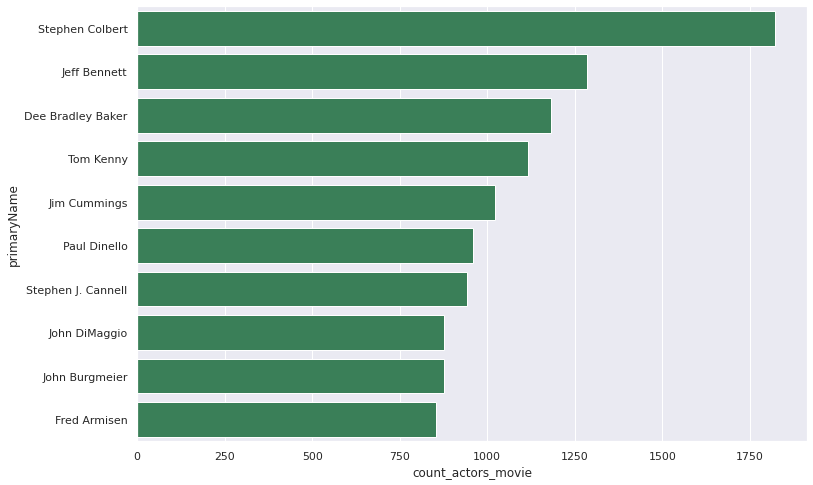

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
# sns.set_palette("pastel")
# sns.barplot(data=top, y="primaryName", x="count_actors_movie")

# sns.barplot(data=top, y="primaryName", x="count_actors_movie")
sns.barplot(data=top, y="primaryName", x="count_actors_movie",color="seagreen")
# seagreen

In [ ]:
# actor = str(input("Choose an actor: "))
# def actor(a):
#     return count_actors_movie
# top['actor'] = books['authors'].apply(n_authors)
# books.head()

In [ ]:
# actor = str(input("Choose an actor "))
# vowels = top['primaryName']
# for i in actor:
#     if i in vowels:
#         actor = "count_actors_movie"
#     else :
#         print('N')
# print (actor) 
# Stephen Colbert


# df1 = df1.set_index('ID')	
# actor = str(input("Choose an actor "))
# if actor == top.loc[top['primaryName']]:
#   print('hi')
#   #  print(actors.loc[actors['averageRating']])
# else:
#    print("Okay...?")

# actor = str(input("Choose an actor "))
# def stream_half(primaryName,averageRating):
#     if actor == top.loc[top['primaryName']]:
#         return (actors.loc[actors['averageRating']])
#     else:
#         return ("Okay...?")
        
# actor = str(input("Choose an actor "))
# if actor == top.loc[top['primaryName']]:
#   print(top.loc[top['count_actors_movie']])
# else:
#   print ('hi')

# actors['Total'] = np.where(actors['primaryName'] == actor, actors['averageRating'] , 0)

Choose an actor Stephen Colbert


KeyError: ignored

In [ ]:
top_actors = actors.sort_values(by=['wheighted'],ascending=False).head(10)

In [ ]:
top_actors

,nconst,primaryName,tconst,averageRating,wheighted,primaryProfession
1200532,nm0006669,William Sadler,tt0111161,9.3,0.001933,actor
1200525,nm0000151,Morgan Freeman,tt0111161,9.3,0.001933,actor
1200526,nm0000175,Stephen King,tt0111161,9.3,0.001933,actor
1200528,nm0348409,Bob Gunton,tt0111161,9.3,0.001933,actor
1200531,nm0000209,Tim Robbins,tt0111161,9.3,0.001933,actor
1170409,nm0005132,Heath Ledger,tt0468569,9.0,0.001851,actor
1170410,nm0001173,Aaron Eckhart,tt0468569,9.0,0.001851,actor
1170406,nm0000288,Christian Bale,tt0468569,9.0,0.001851,actor
1170404,nm0000323,Michael Caine,tt0468569,9.0,0.001851,actor
4981243,nm0680983,Elliot Page,tt1375666,8.8,0.001604,actor


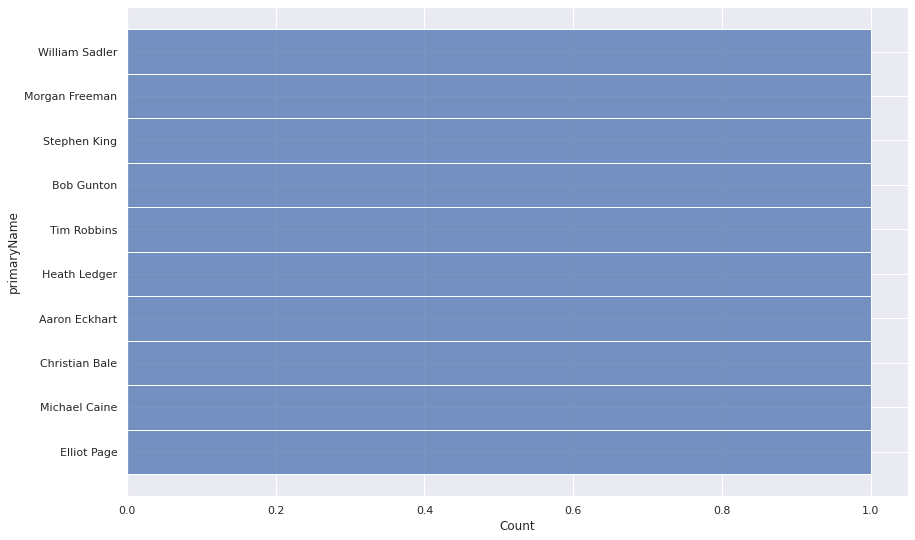

In [ ]:
sns.set(rc={'figure.figsize':(14,9)})
sns.histplot(data=t_a, y="primaryName")

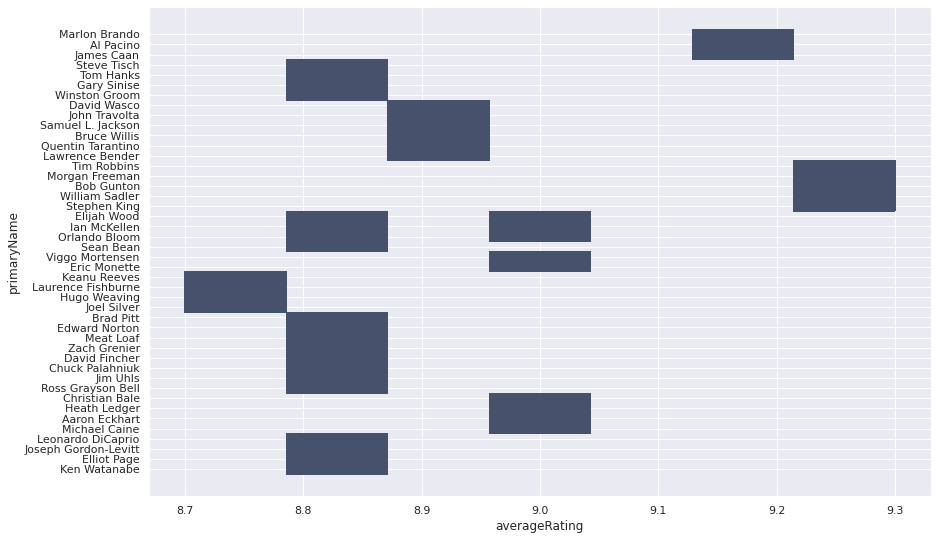

In [ ]:

sns.set(rc={'figure.figsize':(14,9)})
sns.histplot(data=actors, x='averageRating', y="primaryName")

In [ ]:
condition = top_movies2_split['primaryProfession'] == 'actress'
# condition2 = top_movies5['P2'] == 'actress' 
# condition3 = top_movies5['P3'] == 'actress'

actress= top_movies2_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

# actress = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
# actress['primaryName'].value_counts()

In [ ]:
actress['primaryProfession'].value_counts()

actress    1967232
Name: primaryProfession, dtype: int64

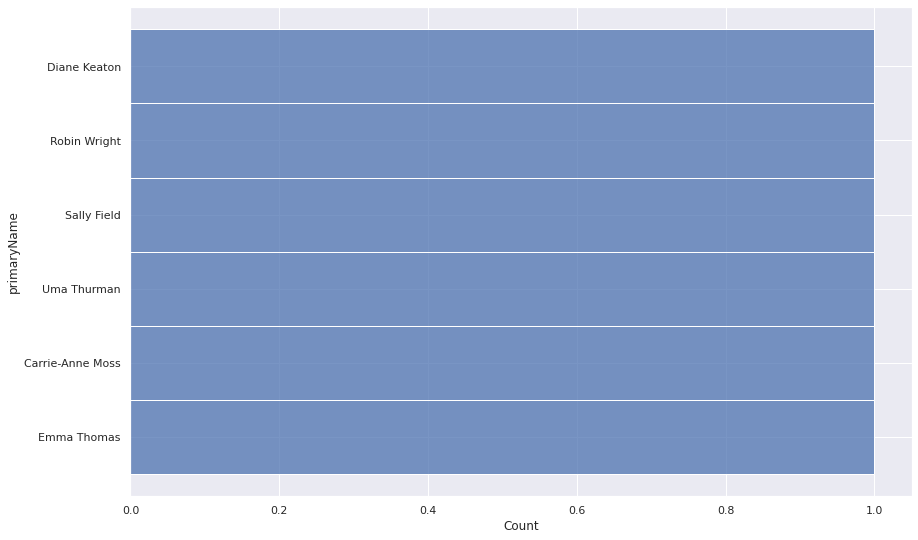

In [ ]:
sns.set(rc={'figure.figsize':(14,9)})
sns.histplot(data=actress, y="primaryName")

In [ ]:
condition = top_movies2_split['primaryProfession'] == 'producer'
# condition2 = top_movies5['P2'] == 'producer'
# condition3 = top_movies5['P3'] == 'producer'

producer = top_movies2_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]
# producer = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
producer['primaryProfession'].value_counts()

producer    3429962
Name: primaryProfession, dtype: int64

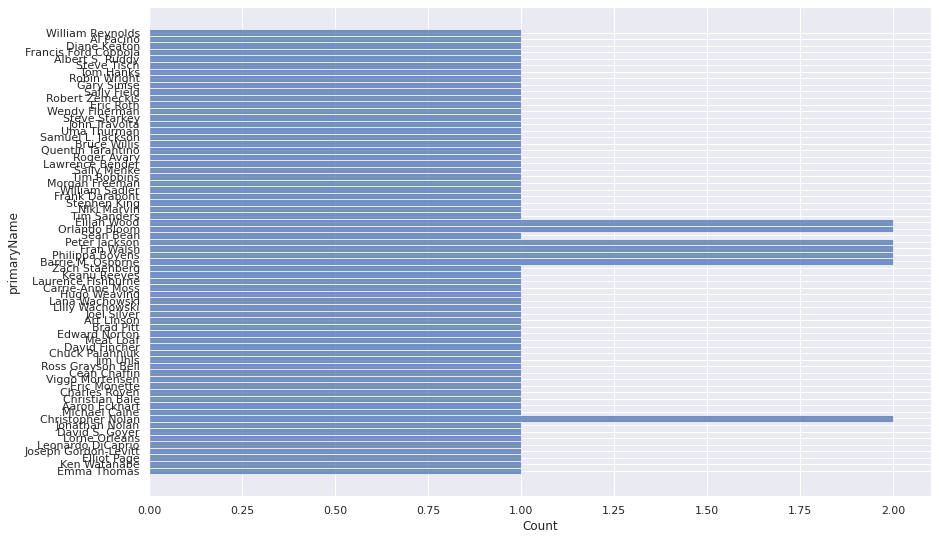

In [ ]:
sns.set(rc={'figure.figsize':(14,9)})
sns.histplot(data=producer, y="primaryName")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
condition = top_movies2_split['primaryProfession'] == 'director'
# condition2 = top_movies5['P2'] == 'director'
# condition3 = top_movies5['P3'] == 'director'

director = top_movies2_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

# director = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
director['primaryProfession'].value_counts()

director    2265398
Name: primaryProfession, dtype: int64

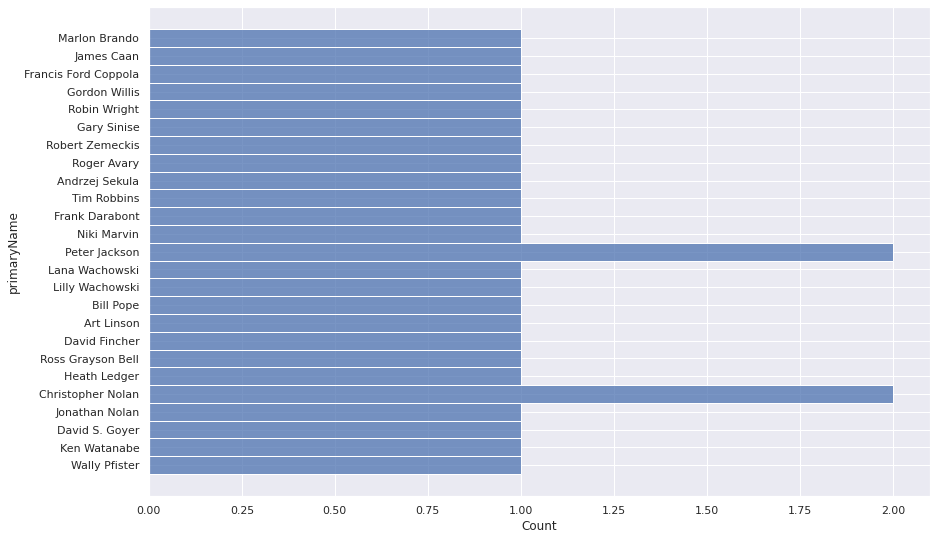

In [ ]:
sns.set(rc={'figure.figsize':(14,9)})
sns.histplot(data=director, y="primaryName")